Sukanya Dutta    Matriculation number: 2696399     Summer Semester 2022/2023    Lexical Approaches to Text and Corpus Comparison  Pr. Dr.Evelyn Gius

# What are the most pressing concerns regarding ‘Climate Change’ among tweeters according to Topic Modeling? 
It's not new to us to hear the term ‘Climate Change’. A topic like Climate Change forces us to talk about both its causes and its effects. Among us, Climate Change is getting more and more awareness. But I'm going to talk about exactly what aspects of Climate Change concern us the most with the help of a tweet data set and how much this matters today since climate change is a multidimensional subject. In this paper, I intend to demonstrate whether we commoners are neglecting the most pressing threats while we are focusing on other concerns. Climate Change affects our organization in almost every aspect of our lives, from organizational to economic to environmental. Which topic has been selected by the majority of tweeters compared to other topics among these aspects?

# Source
As part of this study, a corpus known as ‘Climate Change Tweets’ (Kaggle,2022) has been used. The file contains a list of top tweets containing the keyword ‘Climate Change’, comprising 9050 tweets and 11 columns with the titles UserScreenName, UserName, Timestamp, Text, Embedded_text, Emojis, Comments, Likes, Retweets, and Image links for the period 1/01/2022 through 19/07/2022.

# A theoretical framework for topic modeling
Based on the assumption that each topic is a mixture of over a set of underlying words, and that each document is a mixture of over a set of topic probabilities, the LDA is a generative probabilistic model.
In the field of machine learning (ML) or statistics, dimensionality reduction is a method that relates to reducing the number of random variables in a problem by obtaining a set of principal variables that can be used to solve the problem.
As in clustering, the number of topics is a parameter that is used as an output parameter in unsupervised learning, since the number of topics, just like the number of clusters, is a parameter in clustering. Instead of clustering texts, topic modeling builds clusters of words. A text then consists of all of these topics, with each topic weighing in differently.
A collection of documents can be tagged with abstract "topics" that best represent the information they contain.
The Latent Dirichlet Allocation (LDA) algorithm is a popular topic modeling algorithm for extracting hidden topics from large volumes of text. In LDA, each topic is assumed to be a mixture of words, and each document is assumed to be a mixture of topics.
Parameters of LDA:
An alpha parameter represents a document's topic density. The higher the alpha will be, the more topics there will be in the document, and the more specific the topic distribution will be.
In the same way, the beta parameter measures the number of words required to make up a topic. With high beta, topics are assumed to contain the majority of the words, resulting in a more specific distribution of words per topic.
It is, however, difficult to find a topic that is clear, segregated and meaningful, as this depends heavily on the quality of text preprocessing as well as finding the optimal number of topics (machine learning). 
https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

As prerequisies few libraries such as nltk, re, numpy, pandas, pprint, gensim, spacy, pyLDAvis,matplotlib, logging, warnings and their few packages are meant to be imported. As code progresses I am going to explain their importance as well.

In [21]:
# Run in python console
# nltk
import nltk
from nltk.corpus import stopwords

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy 
import spacy

# Plotting tools
import pyLDAvis
pyLDAvis.enable_notebook()
#import pyLDAvis.gensim  # don't skip this
import pyLDAvis.gensim as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
#warnings.filterwarnings("ignore",category=DeprecationWarning)

The Clean and Removing Noise feature helps to find and eliminate unhelpful parts of the data as well as removing punctuation marks, stop words, and typing errors that are present in the data. The feature converts all characters to lowercase, removes punctuation marks, and removes stop words. While it might be overlooked, the simplest and most effective method of preprocessing text is by lowercasing all of text data. Generally, it is applicable to most text mining and natural language processing problems. It also contributes significantly to maintaining consistency in the outputs. There are a number of stop words in English, including "a", "the", "is", "are" and so on. By eliminating low-information words from the text, stop word removal enables us to focus on the key words(https://www.kdnuggets.com/2019/04/text-preprocessing-nlp-machine-learning.html). In the down cell stopwords have been removed with the help NLTK library.

In [22]:
# NLTK Stop words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

I accessed my dataset using Pandas, a Python library that can read and write files like csv and excel. The df.head() function returns the first 5 rows of the dataframe by default.
The site from where I downloaded the dataset, despite its description of what the dataset is about, there is no mention of the amount of tweets that are included in it. In order to determine the number of tweets residing within my selected dataset, I used the .shape function and it showed the number of rows and columns. As a result, there are 9050 tweets in my dataset.

In [23]:
# Import Dataset
df = pd.read_csv(r'C:\\Users\\sukan\\climate_change.csv')
#print(df.UserName.unique())
df.head()

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,Lauren Boebert,@laurenboebert,2022-01-17T23:32:38.000Z,Lauren Boebert\n@laurenboebert\n·\nJan 18,The only solution I’ve ever heard the Left pro...,NaN,"1,683","2,259",11.7K,[],https://twitter.com/laurenboebert/status/14832...
1,Catherine,@catherine___c,2022-01-17T22:54:02.000Z,Catherine\n@catherine___c\n·\nJan 17,Climate change doesn’t cause volcanic eruption...,NaN,158,64,762,[],https://twitter.com/catherine___c/status/14832...
2,king Keith,@KaConfessor,2022-01-17T23:51:41.000Z,king Keith\n@KaConfessor\n·\nJan 18,Vaccinated tennis ball boy collapses in the te...,NaN,24,118,159,['https://pbs.twimg.com/ext_tw_video_thumb/148...,https://twitter.com/KaConfessor/status/1483225...
3,PETRIFIED CLIMATE PARENT,@climate_parent,2022-01-17T21:42:04.000Z,PETRIFIED CLIMATE PARENT\n@climate_parent\n·\n...,North America has experienced an average winte...,NaN,15,50,158,[],https://twitter.com/climate_parent/status/1483...
4,Thomas Speight,@Thomas_Sp8,2022-01-17T21:10:40.000Z,Thomas Speight\n@Thomas_Sp8\n·\nJan 17,They're gonna do the same with Climate Change ...,🅾,4,24,127,['https://pbs.twimg.com/profile_images/1544171...,https://twitter.com/Thomas_Sp8/status/14831850...


In [24]:
df.shape

(9050, 11)

As a result, in the process of managing topic models all I need is a list of texts that come under Embedded_text that can be used as a starting point. After that special characters that are heavily used in social media domain like '*', '@', '?', single quotes have been replaced with '' or nothing followed by replacing new line character with ' ' or single space. Then I pprint out the only first tweet from the list.pprint is a Python library that allows you to customize the output formatting based on parameters to the constructor.There is still a lot of messy text in the text after I omit the emails and extra spaces. The text is not ready to be consumed by the LDA yet. I need to tokenize each sentence into a list of words, while eliminating all the messy text in the process.

In [25]:
# Convert to list
data = df.Embedded_text.values.tolist()
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]


pprint(data[:1])

<>:4: DeprecationWarning: invalid escape sequence \S
<>:7: DeprecationWarning: invalid escape sequence \s
<>:4: DeprecationWarning: invalid escape sequence \S
<>:7: DeprecationWarning: invalid escape sequence \s
C:\Users\sukan\AppData\Local\Temp\ipykernel_7600\3497167745.py:4: DeprecationWarning: invalid escape sequence \S
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
C:\Users\sukan\AppData\Local\Temp\ipykernel_7600\3497167745.py:7: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', sent) for sent in data]


['The only solution I’ve ever heard the Left propose for climate change is '
 'more taxes, more control and less freedom. They have one playbook and it '
 'fails every single time. 1,683 2,259 11.7K']


Following this, tokenization takes place. By doing so, a string (text document) is immediately turned into a numerical data structure that can be used for machine learning. A computer can also use these features as features as part of a machine learning pipeline in order to trigger more complex decisions or behaviors. Additionally, computers can use them directly to trigger useful actions and responses. Tokenization is an important step in contextual embedding models, including transformer-based models (Vaswani et al., 2017) and BERT models (Devlin et al., 2018) in order to solve problems such as out-of-vocabulary issues. To remove punctuation from the text, I have set deacc=True in Gensim's simple_preprocess().

In [26]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['the', 'only', 'solution', 've', 'ever', 'heard', 'the', 'left', 'propose', 'for', 'climate', 'change', 'is', 'more', 'taxes', 'more', 'control', 'and', 'less', 'freedom', 'they', 'have', 'one', 'playbook', 'and', 'it', 'fails', 'every', 'single', 'time']]


As a next step, we'll look at some word associations. N-gram analyses are often used to identify which words often occur together. Creating a bigram or a trigram model is quite important in order to be able to create a dictionary later on which is going to be used in conjunction with the corpus. During a text analysis, it is common to filter out some stop words, which are common words but do not have significant contextual significance in a sentence. For example, "a", “and”, “but”, and so on).

In [27]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['the', 'only', 'solution', 've', 'ever', 'heard', 'the', 'left', 'propose', 'for', 'climate', 'change', 'is', 'more', 'taxes', 'more', 'control', 'and', 'less', 'freedom', 'they', 'have', 'one', 'playbook', 'and', 'it', 'fails', 'every', 'single', 'time']


The following four functions has been defined with a for loop function in each of them to fulfill the basic criteria of removing stopwords, forming bigrams and trigrams, and then lemmatizing the result.

In [28]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [29]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['solution', 'ever', 'hear', 'leave', 'propose', 'climate', 'change', 'taxis', 'control', 'less', 'freedom', 'playbook', 'fail', 'single', 'time']]


The dictionary (id2word) and corpus are the two main inputs to the LDA topic model. Using it, you can determine the vocabulary size, as well as debug and print out topics. We will create both of these inputs. Gensim assigns a unique identifier to each word in the document. The corpus shown above is a mapping of (word_id, word_frequency). A word id of zero occurs only once in the first document, as indicated by (0, 1) above. Similarly, word id 1 occurs once and so on. This is used by the LDA model, and the id is passed to the dictionary as a key to determine what word it corresponds to.

In [30]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]]


Word_id 0 represents to ‘change’ that occurred only once within the corpus.

In [31]:
id2word[0]

'change'

In the code we see down there, it is basically representing the combination of word_id, word_frequency, but the only thing that is different is that the numbers are written as words in order to make it more human readable.

In [32]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('change', 1),
  ('climate', 1),
  ('control', 1),
  ('ever', 1),
  ('fail', 1),
  ('freedom', 1),
  ('hear', 1),
  ('leave', 1),
  ('less', 1),
  ('playbook', 1),
  ('propose', 1),
  ('single', 1),
  ('solution', 1),
  ('taxis', 1),
  ('time', 1)]]

I have everything in place to train the LDA model, but I would like to provide a number of topics as well as the corpus and dictionary required for training the model. ‘chunksize’ tells how many documents will be used in each training chunk, ‘update_every’ tells how frequently the model parameters will be updated during training, and ‘passes’ tells how many training cycles will be run. Here I chose 20 topics to work with, I assign 1 for ‘update_every’ and 10 for ‘passes’.

In [33]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

One can see the keywords for each topic and the weight of each keyword as displayed in the LDA model above which is built with 20 different topics each combining a specific set of keywords that contribute a certain amount of weight to the topic. One can observe both the keywords for each topic as well as the weight(importance) of each keyword. Accordingly, the top 10 keywords in topic 0 are: 'take', 'earth', 'call'...and so on. The weight of 'earth' in topic 0 is 12%. Judging the keywords, from each topic this can be understood that effects of climate change have touched ecery sector of life. 

In [34]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.213*"take" + 0.121*"earth" + 0.108*"call" + 0.040*"wake" + 0.032*"little" '
  '+ 0.032*"destroy" + 0.027*"position" + 0.016*"side" + 0.015*"compare" + '
  '0.011*"age"'),
 (1,
  '0.073*"end" + 0.069*"thread" + 0.063*"science" + 0.060*"continue" + '
  '0.044*"set" + 0.039*"challenge" + 0.034*"place" + 0.033*"political" + '
  '0.030*"force" + 0.030*"democracy"'),
 (2,
  '0.091*"record" + 0.071*"last" + 0.061*"global_warme" + 0.050*"join" + '
  '0.044*"discuss" + 0.043*"event" + 0.042*"child" + 0.032*"poverty" + '
  '0.028*"provide" + 0.025*"current"'),
 (3,
  '0.178*"new" + 0.096*"cause" + 0.053*"biden" + 0.036*"create" + 0.035*"tax" '
  '+ 0.028*"battle" + 0.027*"denier" + 0.026*"death" + 0.023*"mention" + '
  '0.023*"building"'),
 (4,
  '0.076*"major" + 0.058*"old" + 0.051*"never" + 0.044*"space" + 0.041*"close" '
  '+ 0.037*"response" + 0.036*"analysis" + 0.033*"cnn" + 0.033*"river" + '
  '0.026*"snow"'),
 (5,
  '0.142*"want" + 0.072*"vote" + 0.067*"affect" + 0.062*"politici

Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. In my experience, topic coherence score, in particular, has been more helpful. Perplexity measures how well a probability model predicts a sample. For a given value of , the LDA model is estimated. Afterwards, compare the theoretical word distributions represented by the topics with the actual topic mixtures, or word distributions in your documents. A topic's Topic Coherence can be calculated by measuring the degree of semantic similarity between high-scoring words within that topic. Statistically derived topics can be distinguished from those that can be interpreted semantically.

In [35]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.




Perplexity:  -16.561250873049108


In [36]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3099597483887469


In pyLDAvis package’s interactive chart, an appropriate topic model will have a substantial number of large, non-overlapping bubbles distributed throughout the chart instead of being clustered in a single quadrant. A graph that depicts a model with many topics overlaid on each other typically see bubbles of small sizes clustered together in one area of the chart. If we move your mouse over one of the bubbles, we will see the words and bars on the right-hand side update to reflect the changes. The salient keywords that comprise the selected topic are those that form the core of the topic. Having beforehand known how many natural topics were contained in the document, identifying the best model was relatively straightforward.

# My thought
In cluster 1, I receive a set of topics that make no sense to me; tokens such as 'see', 'com', 'reply', 'org', 'get', etc. alone cannot provide any useful information. The two main topics that are predominant here are 'climate' and 'change'. Nevertheless, when moving my cursor to cluster 2, several topics, including 'temperature,' 'work,' 'food,' 'health,' 'environment,' 'price,' 'cost,', and so on, seem to make sense to some extent, however, we are still unable to identify the broad aspect. Still, we can conclude from this cluster that services are dependent on the environment, or that environment has a significant bearing on those services. 
In spite of the fact that other clusters, except for clusters 1 and 2, overlap with each other, when I move to cluster 3, topics become more interesting and of greater significance. These topics include energy, oil, fire, fuel, destruction, and industry. An indication of political involvement can be found in Cluster 6, 17. Some of the environment relared terms like river, snow, valley, biodiversity, mine, paper, natural disaster appear in cluster 15.

to conclude, industrial or organizational aspects revolving around Climate change gained more focus rather political, public, policy making aspect. Environmental aspect gained least favour from tweeters.


In [37]:
# Visualize the topics
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

C:\Users\sukan\AppData\Roaming\Python\Python39\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.484589 -0.189502       1        1  52.158978
6     -0.183470  0.408221       2        1   8.444400
13    -0.046069  0.024515       3        1   4.470205
3     -0.001845 -0.000544       4        1   3.055061
11    -0.007039  0.001825       5        1   3.018172
1      0.012971 -0.006701       6        1   2.935345
12    -0.000447 -0.001105       7        1   2.895759
15     0.002094 -0.002301       8        1   2.599849
7      0.027387 -0.011793       9        1   2.575176
2      0.022893 -0.010245      10        1   2.447338
18     0.021056 -0.009387      11        1   2.262304
9      0.042219 -0.016308      12        1   2.207350
16     0.049800 -0.018243      13        1   1.990175
19     0.066501 -0.022189      14        1   1.611259
4      0.060579 -0.020937      15        1   1.606244
0      0.067321 -0.022336      16        1   1.553073
5      0.071634 -0.023210      17        1   1.518004
17     0.084070 -0.025392      18        1   1.142406
8      0.092374 -0.026603      19        1   0.957670
14     0.102560 -0.027764      20        1   0.551230, topic_info=               Term          Freq         Total Category  logprob  loglift
1           climate  23469.000000  23469.000000  Default  30.0000  30.0000
0            change  20574.000000  20574.000000  Default  29.0000  29.0000
93    climatechange   1506.000000   1506.000000  Default  28.0000  28.0000
103          people   1401.000000   1401.000000  Default  27.0000  27.0000
721             new   1308.000000   1308.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
2891      emergency      0.036208      1.342220  Topic20 -10.5092   1.5880
3566           heat      0.036209      1.342572  Topic20 -10.5091   1.5877
2725       heatwave      0.036209      1.342635  Topic20 -10.5091   1.5877
1719            man      0.036207      1.342088  Topic20 -10.5092   1.5881
1347          flood      0.036208      1.342382  Topic20 -10.5092   1.5878

[747 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
773       8  0.990254    able
1259      6  0.994146  accept
1212      5  0.990870  accord
166      18  0.996963     act
908       1  0.999063  action
...     ...       ...     ...
1211      5  0.982361  worsen
991      15  0.965320   worth
298      12  0.992985   write
1109      8  0.989679   wrong
68        1  0.999481    year

[488 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 7, 14, 4, 12, 2, 13, 16, 8, 3, 19, 10, 17, 20, 5, 1, 6, 18, 9, 15])

In order to determine the optimal number of topics for LDA, we have to a function which calculates at what number of topics we can obtain the highest coherence. 

In [38]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               num_topics=num_topics,
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [39]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

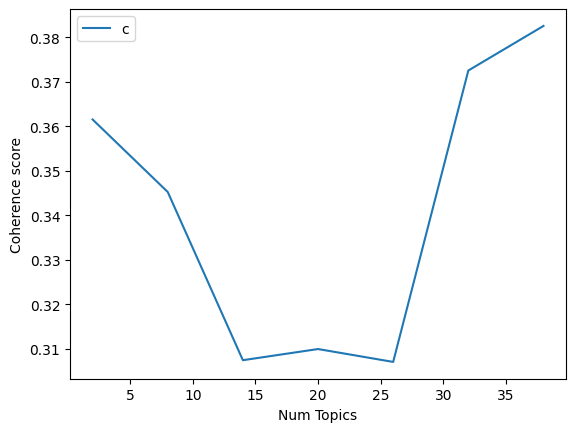

In [40]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

According to the results below, if I had selected 38 topics that would provide me with the highest level of coherence.

In [41]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3615
Num Topics = 8  has Coherence Value of 0.3453
Num Topics = 14  has Coherence Value of 0.3075
Num Topics = 20  has Coherence Value of 0.31
Num Topics = 26  has Coherence Value of 0.3071
Num Topics = 32  has Coherence Value of 0.3725
Num Topics = 38  has Coherence Value of 0.3826


# Conclusion:
In any form of communication or expression, sentiment plays an important role. In spite of the fact that I chose topic modeling hoping to be able to extract multiple topics that are directly or indirectly related to climate change or environmental issues, the key words I derive from each topic serve mostly as auxiliary words. Those key words/tokens/topics do not evoke any sentiment of concern. By using lexicon-based sentiment analysers in the future, not only will we be able to get closer to subjectivity and factualness of data, but we will also be able to analyse polarity of topics.